# Rock Age Classification Using EMPA and Laser Ablation Data

### Problem Statement
This notebook analyzes chemical composition data of rocks obtained from two methods:
- **EMPA**
- **Laser Ablation**

The goal is to classify rocks into three age categories (1, 2, 3) based on their composition.

### Objectives
1. Explore the chemical composition data.
2. Preprocess the data for machine learning and deep learning.
3. Train and evaluate:
   - Random Forest (as a baseline).
   - Feed Forward Neural Network (for complex pattern recognition).
4. Compare the performance of the models and analyze the results.

### Why This Is Important
Classifying rock ages helps in understanding geological processes, identifying resource-rich areas, and aiding in mineral exploration.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
# Load the Excel file
file_path = "/content/Ali New Spreadsheet.xlsx"
data = pd.read_excel(file_path)

In [4]:
print(data.info())  # Overview of data types and non-null counts
print("\nFirst 5 Rows:")
print(data.head())  # Display the first 5 rows of the dataset
print("\nSummary Statistics:")
print(data.describe())  # Statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAMPLE  653 non-null    object 
 1   Lab     653 non-null    object 
 2   CaO     653 non-null    float64
 3   SiO2    653 non-null    float64
 4   Cr2O3   653 non-null    object 
 5   Na2O    653 non-null    float64
 6   TiO2    653 non-null    float64
 7   MnO     653 non-null    float64
 8   MgO     653 non-null    float64
 9   FeO     653 non-null    float64
 10  Al2O3   653 non-null    float64
 11  K2O     653 non-null    float64
 12  Mg#     653 non-null    float64
 13  Li      189 non-null    object 
 14  Be      189 non-null    object 
 15  B       189 non-null    object 
 16  Mg      189 non-null    float64
 17  Si      189 non-null    float64
 18  Ca      189 non-null    float64
 19  Ca.1    189 non-null    float64
 20  Sc      189 non-null    float64
 21  Ti      189 non-null    float64
 22  V 

In [5]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

print("\nNumerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)



Numerical Features:
Index(['CaO', 'SiO2', 'Na2O', 'TiO2', 'MnO', 'MgO', 'FeO', 'Al2O3', 'K2O',
       'Mg#', 'Mg', 'Si', 'Ca', 'Ca.1', 'Sc', 'Ti', 'V', 'Mn', 'Co', 'Sr', 'Y',
       'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho',
       'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U', 'C', 'M', 'R', 'T'],
      dtype='object')

Categorical Features:
Index(['SAMPLE', 'Lab', 'Cr2O3', 'Li', 'Be', 'B', 'Cr', 'Ni', 'Cu', 'Rb', 'Cs',
       'Ba', 'Pb'],
      dtype='object')


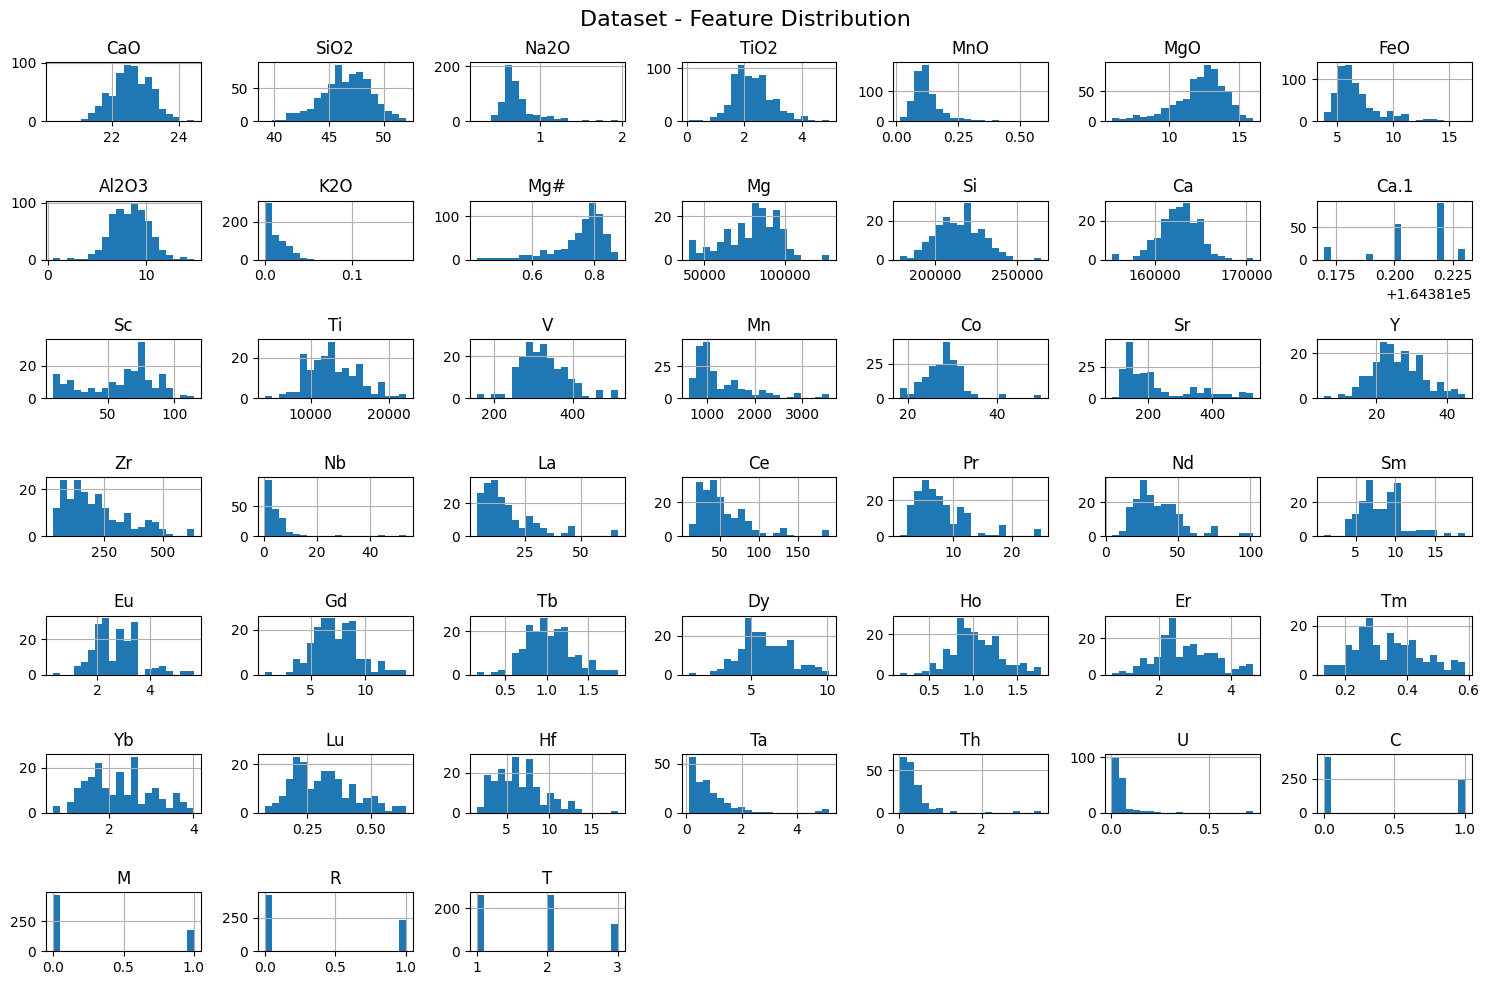

In [52]:
def plot_histograms(data, title):
    data.hist(bins=20, figsize=(15, 10))

#The bins parameter specifies the number of intervals or ranges the data is divided into along the x-axis.
#Each bin represents a range of values, and the height of the bar indicates the frequency (or count) of values that fall within that range.
    plt.suptitle(f"{title} - Feature Distribution", fontsize=16)
    plt.tight_layout()
    plt.show()

plot_histograms(data[numerical_features], "Dataset")


<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


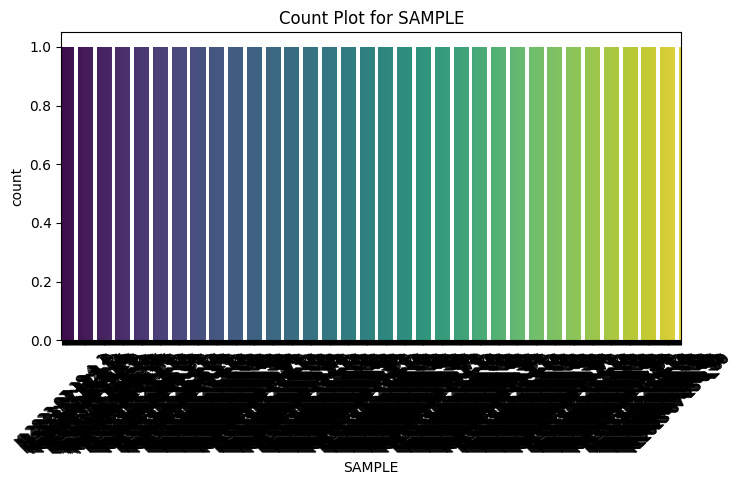

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


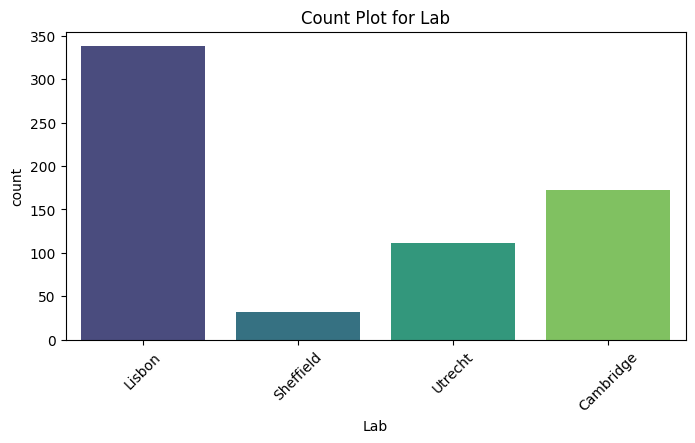

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


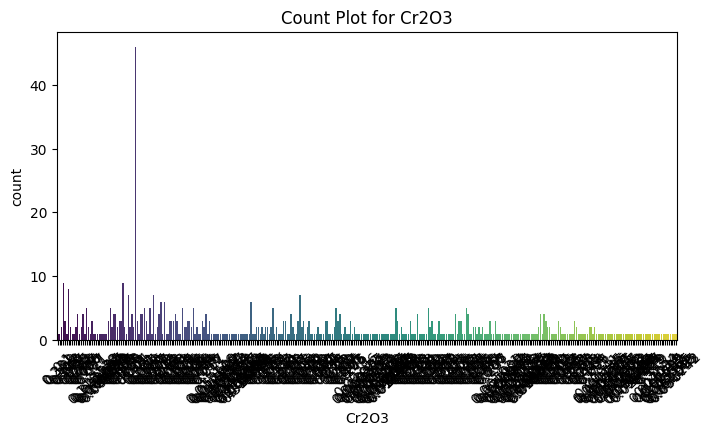

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


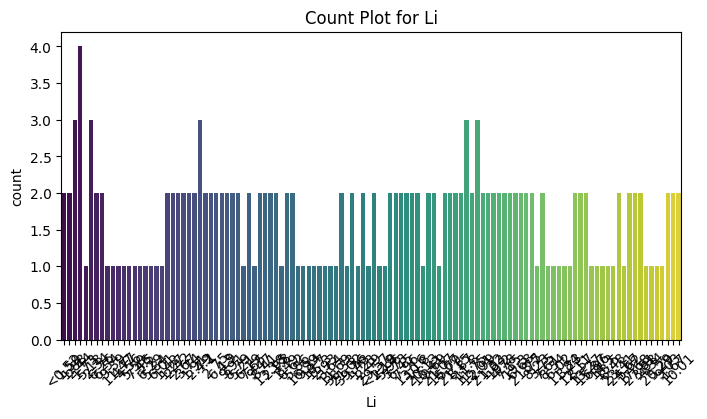

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


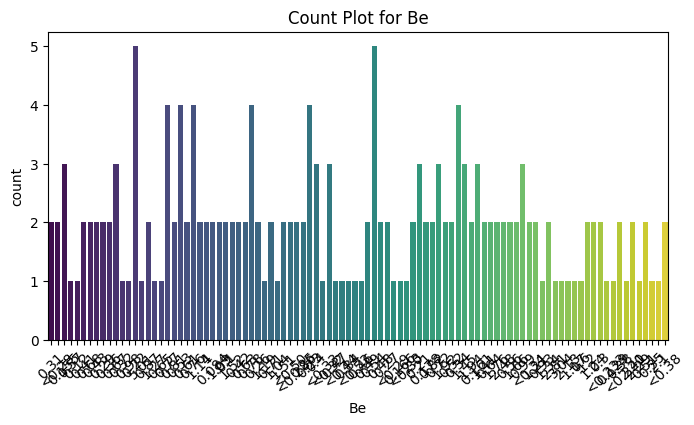

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


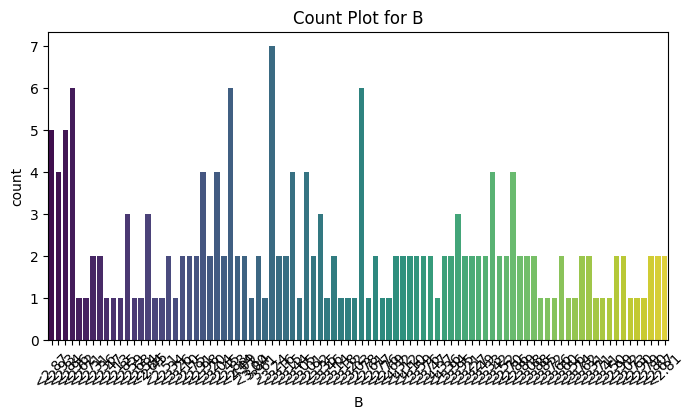

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


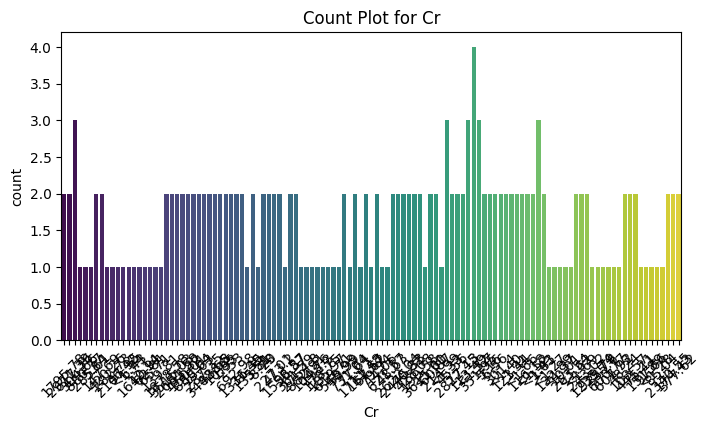

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


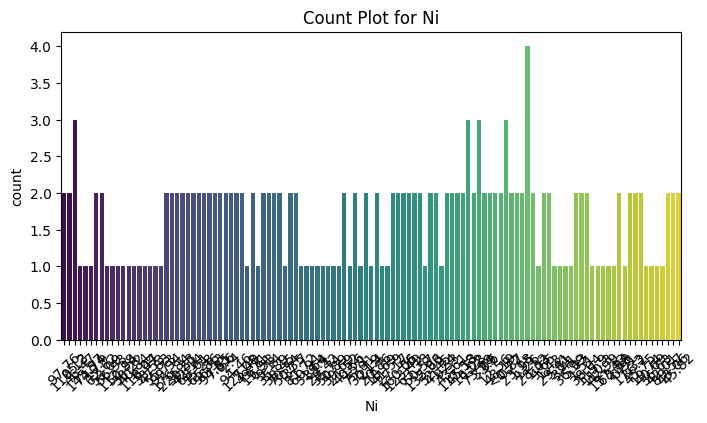

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


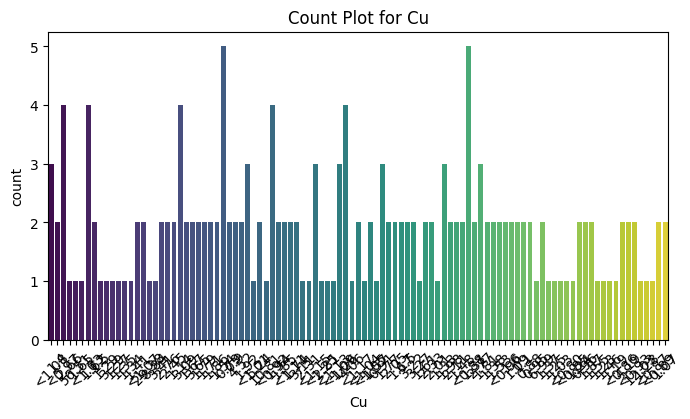

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


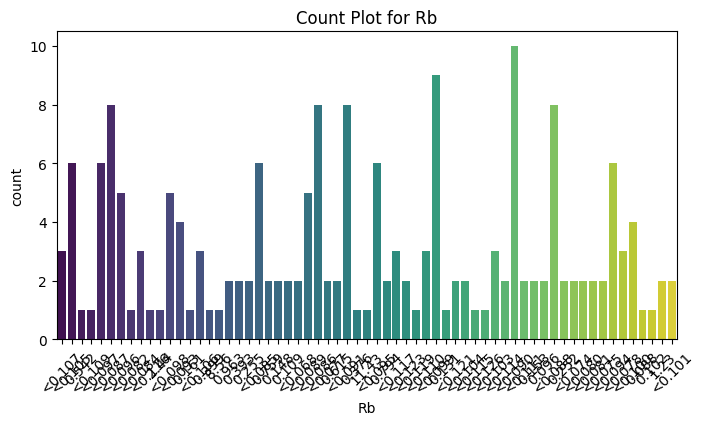

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


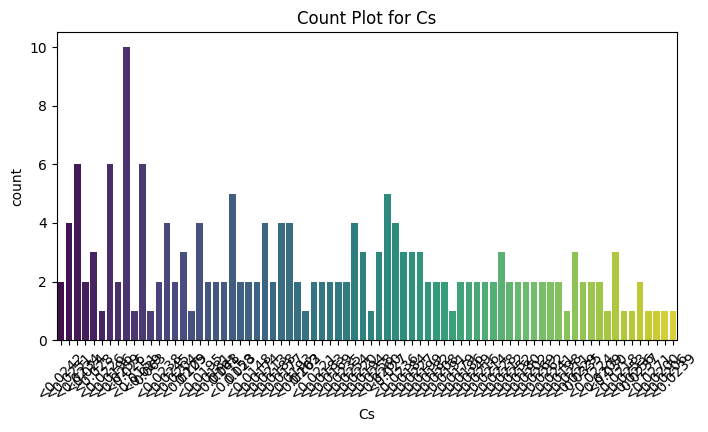

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


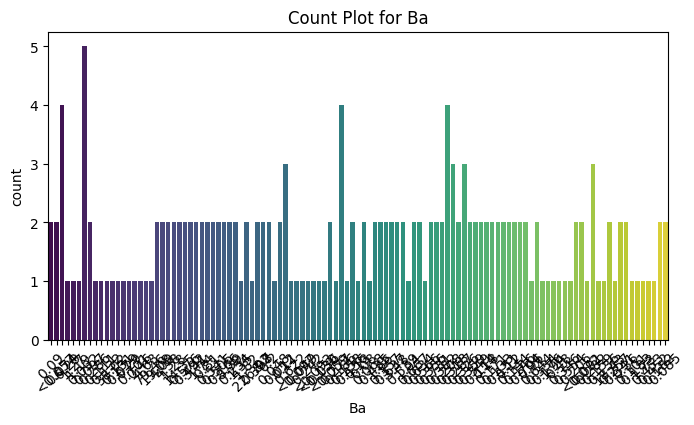

<ipython-input-7-e2f4604fc297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")


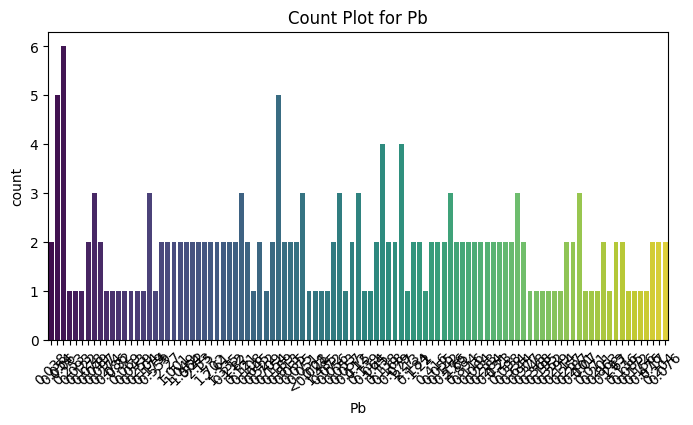

In [7]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature, palette="viridis")
    plt.title(f"Count Plot for {feature}")
    plt.xticks(rotation=45)
    plt.show()

In [11]:
# Define target and selected features for EMPA and Laser Ablation
empa_selected_features = [ 'MgO', 'FeO', 'Al2O3', 'MnO',  # Core Features
    'SiO2', 'TiO2', 'Na2O', 'CaO', 'P2O5', 'Cr2O3', 'ZnO',  # Additional Oxides
    'T'  # Target variable
]
laser_selected_features = [
    'Mg#', 'Si', 'Al', 'Mg', 'La', 'Nd', 'Yb',  # Core Features
    'Sc', 'Ti', 'V', 'Cr', 'Co', 'Ni',  # Transition Metals
    'Rb', 'Sr', 'Ba',  # Alkali Metals
    'Ce', 'Pr', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Lu',  # Rare Earth Elements
    'Zr', 'Nb', 'Hf',  # HFSEs
    'Th', 'U', 'Pb',  # Trace Elements
    'T'  # Target variable
]

In [49]:
# Check which features exist in the dataset and adjust dynamically
# Filter EMPA features: Keep only columns present in the dataset
# Ensures no error due to missing columns in the selected features list
empa_selected_features = [col for col in empa_selected_features if col in data.columns]

# Filter Laser Ablation features: Similar filtering for Laser Ablation dataset
laser_selected_features = [col for col in laser_selected_features if col in data.columns]


print("Selected EMPA Features:", empa_selected_features)
print("Selected Laser Ablation Features:", laser_selected_features)

Selected EMPA Features: ['MgO', 'FeO', 'Al2O3', 'MnO', 'SiO2', 'TiO2', 'Na2O', 'CaO', 'Cr2O3', 'T']
Selected Laser Ablation Features: ['Mg#', 'Si', 'Mg', 'La', 'Nd', 'Yb', 'Sc', 'Ti', 'V', 'Cr', 'Co', 'Ni', 'Rb', 'Sr', 'Ba', 'Ce', 'Pr', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Lu', 'Zr', 'Nb', 'Hf', 'Th', 'U', 'Pb', 'T']


In [13]:
# Filter the datasets based on selected features
empa_data = data[empa_selected_features]
laser_ablation_data = data[laser_selected_features]

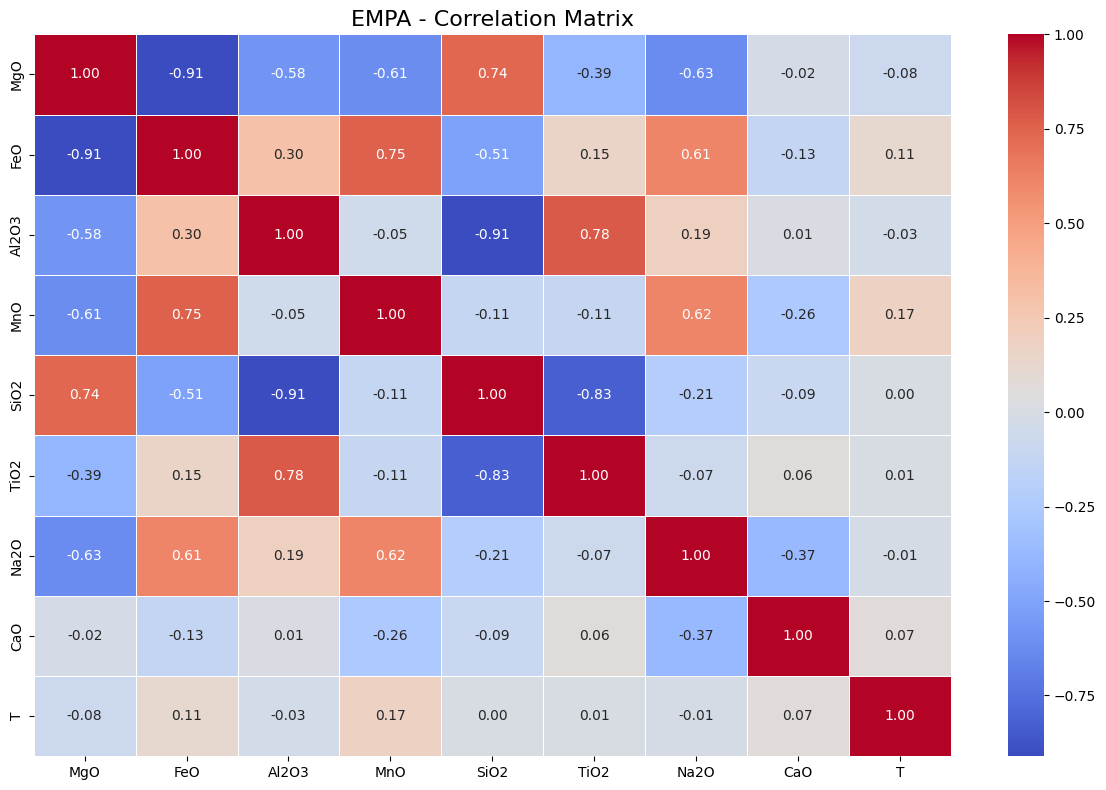

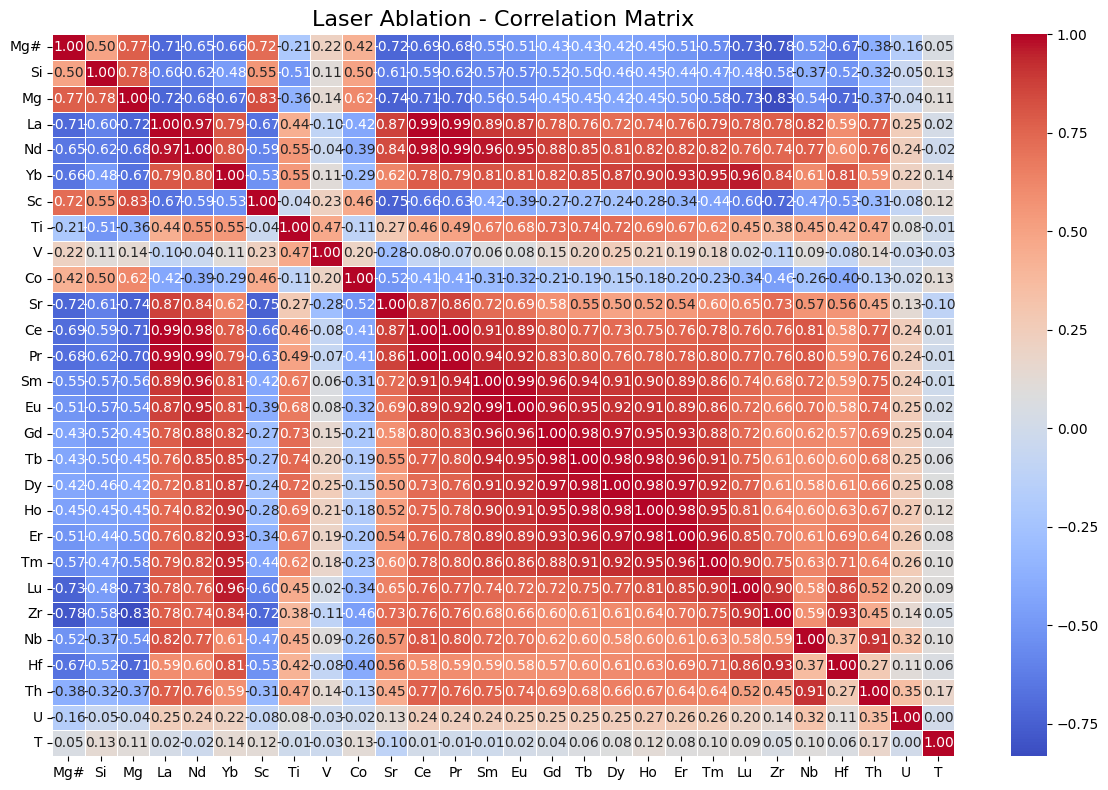

In [14]:
# Function to plot the correlation matrix, excluding non-numeric columns and handling NaNs
def plot_correlation_matrix(data, title):
    # Drop non-numeric columns
    numeric_data = data.select_dtypes(include=['number'])

    # Handle missing values (either drop or fill them)
    numeric_data = numeric_data.dropna()  # Drop rows with NaN values (you can also use fillna() to fill missing values)

    # Calculate the correlation matrix
    corr = numeric_data.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f"{title} - Correlation Matrix", fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot correlation matrix for EMPA and Laser Ablation data
plot_correlation_matrix(empa_data, "EMPA")
plot_correlation_matrix(laser_ablation_data, "Laser Ablation")

In [17]:
# Function to preprocess data (handling non-numeric values, missing data, scaling)
def preprocess_data(data, target_column):
    # Drop rows with missing or invalid values
    data = data.dropna()

    # Identify non-numeric columns
    non_numeric_cols = data.select_dtypes(include=['object']).columns

    # Convert non-numeric columns using Label Encoding (if applicable)
    if len(non_numeric_cols) > 0:
        print(f"Encoding non-numeric columns: {non_numeric_cols}")
        for col in non_numeric_cols:
            data[col] = data[col].astype(str)  # Ensure everything is string before encoding
            data[col] = data[col].factorize()[0]  # Convert to numeric using factorize (or LabelEncoder)

    # Separate input features and the target column
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Standardize the features
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X, y

In [18]:
# Preprocess EMPA and Laser Ablation data
empa_X, empa_y = preprocess_data(empa_data, target_column='T')
laser_X, laser_y = preprocess_data(laser_ablation_data, target_column='T')

Encoding non-numeric columns: Index(['Cr2O3'], dtype='object')
Encoding non-numeric columns: Index(['Cr', 'Ni', 'Rb', 'Ba', 'Pb'], dtype='object')


<ipython-input-17-69588a136b7c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(str)  # Ensure everything is string before encoding
<ipython-input-17-69588a136b7c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].factorize()[0]  # Convert to numeric using factorize (or LabelEncoder)
<ipython-input-17-69588a136b7c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [19]:
print(f"EMPA features shape: {empa_X.shape}, EMPA target shape: {empa_y.shape}")
print(f"Laser Ablation features shape: {laser_X.shape}, Laser Ablation target shape: {laser_y.shape}")

EMPA features shape: (653, 9), EMPA target shape: (653,)
Laser Ablation features shape: (189, 32), Laser Ablation target shape: (189,)


In [20]:
# Split the data into training and testing sets
empa_X_train, empa_X_test, empa_y_train, empa_y_test = train_test_split(empa_X, empa_y, test_size=0.2, random_state=42)
laser_X_train, laser_X_test, laser_y_train, laser_y_test = train_test_split(laser_X, laser_y, test_size=0.2, random_state=42)

In [21]:
print(f"EMPA Train Size: {empa_X_train.shape}, Test Size: {empa_X_test.shape}")
print(f"Laser Train Size: {laser_X_train.shape}, Test Size: {laser_X_test.shape}")


EMPA Train Size: (522, 9), Test Size: (131, 9)
Laser Train Size: (151, 32), Test Size: (38, 32)


Machine Leaning Model Random Forest


Random Forest is a robust and versatile machine learning algorithm that excels in many classification tasks. Here’s why it was an appropriate choice for this project.

Handles Mixed Data Types:

Random Forest can process both numerical and categorical features without requiring extensive preprocessing (e.g., one-hot encoding for categorical features).

Resilience to Overfitting:

By aggregating the predictions of multiple decision trees, Random Forest reduces the risk of overfitting, which is common in single decision trees.

Feature Importance:

Random Forest provides insights into feature importance, helping to identify the most influential variables in the dataset.

Performance on Imbalanced Data:

It can handle class imbalance effectively, especially when combined with techniques like class weighting or oversampling.

Ease of Implementation:

Scikit-learn's implementation of Random Forest makes it straightforward to train and evaluate the model.

Use Case in This Project:

The dataset has a mix of features that may not exhibit linear relationships, and Random Forest can effectively model these complex interactions.
It is a reliable baseline model to compare against the deep learning architecture.

In [22]:
#the function explicitly returns a results dictionary at the end of its execution
def train_and_evaluate(model_class, param_sets, X_train, y_train, X_test, y_test, data_name, model_name):
    results = {"cv_accuracies": [], "test_accuracies": []}
    for i, params in enumerate(param_sets): #for loop
        print(f"\nTraining {model_name} on {data_name} with parameter set {i + 1}: {params}")
        model = model_class(**params)

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
        results["cv_accuracies"].append(cv_scores.mean())

        # Fit the model on the training set
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, predictions)
        print(f"Test Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, predictions))
        results["test_accuracies"].append(accuracy)

    return results  # Ensure this dictionary is returned, The returned value can be stored in a variable, passed to another function, or used in further computations.

# Define parameter sets for Random Forest
rf_params = [
    {"n_estimators": 100, "max_depth": 10, "random_state": 42},
    {"n_estimators": 200, "max_depth": 15, "random_state": 42},
    {"n_estimators": 300, "max_depth": None, "random_state": 42}
]



In [23]:
print("\n===== Random Forest on EMPA Data =====")
empa_results = train_and_evaluate(RandomForestClassifier, rf_params, empa_X_train, empa_y_train, empa_X_test, empa_y_test, "EMPA", "Random Forest")

print("\n===== Random Forest on Laser Ablation Data =====")
laser_results = train_and_evaluate(RandomForestClassifier, rf_params, laser_X_train, laser_y_train, laser_X_test, laser_y_test, "Laser Ablation", "Random Forest")



===== Random Forest on EMPA Data =====

Training Random Forest on EMPA with parameter set 1: {'n_estimators': 100, 'max_depth': 10, 'random_state': 42}
Cross-Validation Accuracy: 0.7796 (+/- 0.0295)
Test Accuracy: 0.7481
              precision    recall  f1-score   support

           1       0.75      0.79      0.77        53
           2       0.76      0.76      0.76        45
           3       0.73      0.67      0.70        33

    accuracy                           0.75       131
   macro avg       0.75      0.74      0.74       131
weighted avg       0.75      0.75      0.75       131


Training Random Forest on EMPA with parameter set 2: {'n_estimators': 200, 'max_depth': 15, 'random_state': 42}
Cross-Validation Accuracy: 0.7989 (+/- 0.0414)
Test Accuracy: 0.7481
              precision    recall  f1-score   support

           1       0.75      0.77      0.76        53
           2       0.72      0.76      0.74        45
           3       0.79      0.70      0.74        3

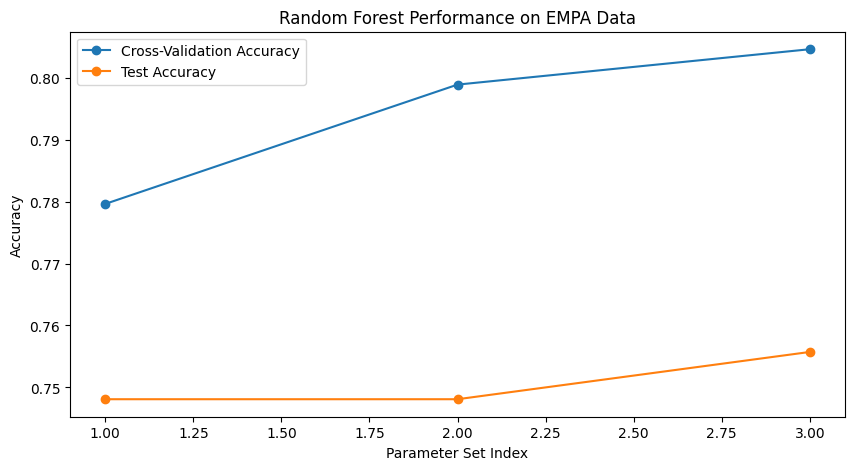

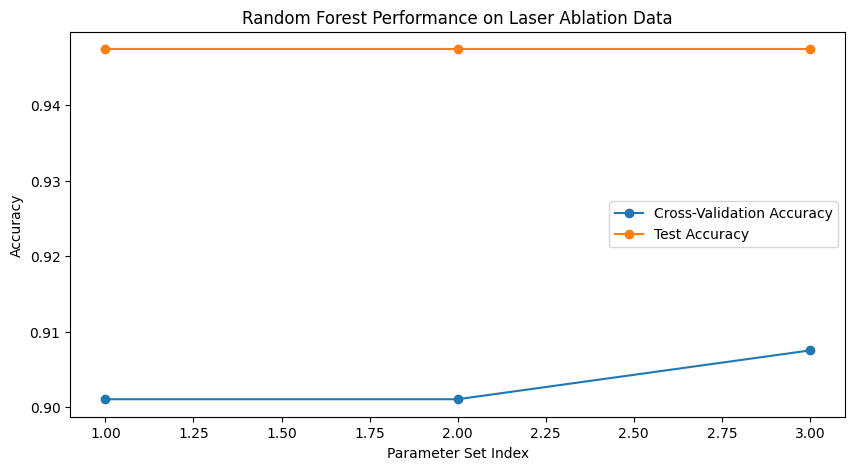

In [24]:
# Plot for EMPA Data
plt.figure(figsize=(10, 5))
param_indices = range(1, len(rf_params) + 1)
plt.plot(param_indices, empa_results["cv_accuracies"], label="Cross-Validation Accuracy", marker='o')
plt.plot(param_indices, empa_results["test_accuracies"], label="Test Accuracy", marker='o')
plt.xlabel("Parameter Set Index")
plt.ylabel("Accuracy")
plt.title("Random Forest Performance on EMPA Data")
plt.legend()
plt.show()

# Plot for Laser Ablation Data
plt.figure(figsize=(10, 5))
param_indices = range(1, len(rf_params) + 1)
plt.plot(param_indices, laser_results["cv_accuracies"], label="Cross-Validation Accuracy", marker='o')
plt.plot(param_indices, laser_results["test_accuracies"], label="Test Accuracy", marker='o')
plt.xlabel("Parameter Set Index")
plt.ylabel("Accuracy")
plt.title("Random Forest Performance on Laser Ablation Data")
plt.legend()
plt.show()



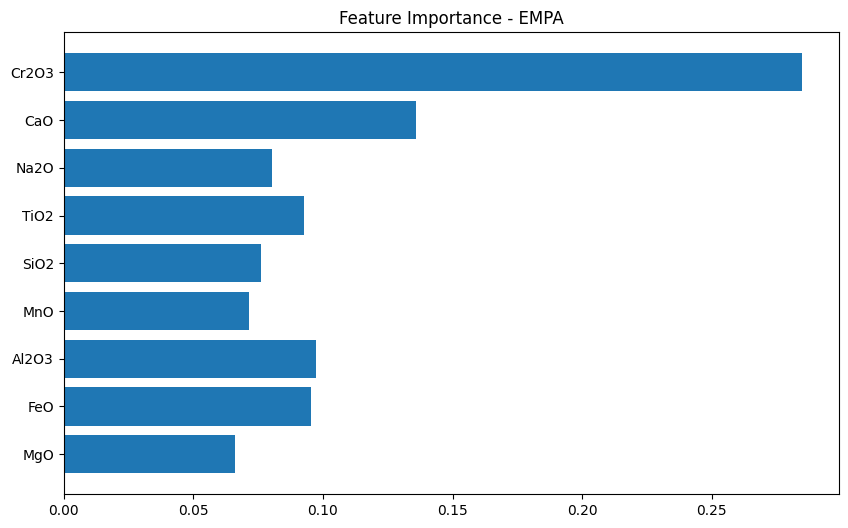

In [25]:
# Train a Random Forest model to identify feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(empa_X_train, empa_y_train)

# Plot feature importance
importance = model.feature_importances_
feature_names = empa_X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.title("Feature Importance - EMPA")
plt.show()


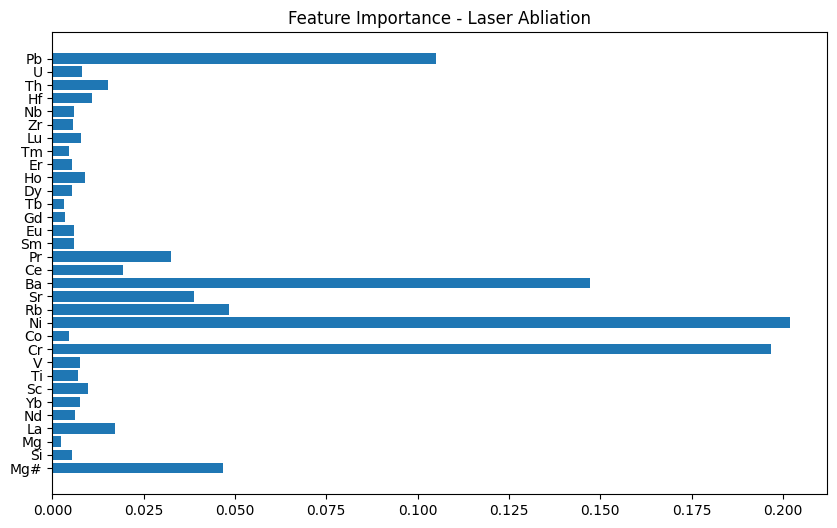

In [26]:
# Train a Random Forest model to identify feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(laser_X_train, laser_y_train)

# Plot feature importance
importance = model.feature_importances_
feature_names = laser_X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.title("Feature Importance - Laser Abliation")
plt.show()

In [53]:
### Insights from Feature Importance Analysis

#1. **EMPA Data**:
#  - Features like `Cr2O3` and `CrO` were identified as the most important predictors for rock age classification.
#  - This aligns with geological expectations that certain oxides play a critical role in determining rock age.

#2. **Laser Ablation Data**:
#   - Rare earth elements such as `Ni` and `Cr` were found to be highly important, highlighting their significance in distinguishing between rock age classes.

#3. **General Observation**:
#   - The feature importance analysis helps validate the model's decision-making process and provides insights for domain experts to focus on key features for further analysis.


In [54]:
#############################----- DEEP LEARNING -----#################################

Deep Learning Model Feed Forward Neural Network for multiclass classification

A Feed Forward Neural Network (FFNN) is a type of deep learning model designed to handle complex relationships in data. Here’s why it was chosen for multiclass classification in this project.

Ability to Model Non-Linear Relationships:

FFNNs use activation functions like ReLU to capture non-linear relationships that traditional algorithms (e.g., Random Forest) might struggle with.

Scalability:

Neural networks perform well when provided with large datasets and sufficient computational resources, offering scalability for future dataset expansions.

Multiclass Capability:

With a softmax output layer, FFNNs can handle multiclass classification tasks, outputting probabilities for each class.

Flexibility:

The architecture of an FFNN can be customized by adjusting the number of layers, neurons, and dropout rates to prevent overfitting and optimize performance.

Improvement Over Traditional Methods:

While Random Forest works well as a baseline, neural networks can outperform in scenarios where patterns in the data are highly complex or hierarchical.

Use Case in This Project:

The multiclass nature of the target variable (e.g., rock age classes) benefits from the probabilistic outputs of a softmax layer.
The model leverages deep learning to identify intricate patterns in the dataset that may not be apparent to traditional machine learning algorithms.

In [27]:
# Function to preprocess data (handling missing values with mean, scaling)
def preprocess_data(data, target_column):
    # Handle missing values by replacing with the mean
    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert non-numeric to NaN
    data = data.fillna(data.mean())

    # Separate input features and the target column
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Standardize the features, scaling
    scaler = StandardScaler()
    empa_X_train = scaler.fit_transform(empa_X_train)
    empa_X_test = scaler.transform(empa_X_test)

    laser_X_train = scaler.fit_transform(laser_X_train)
    laser_X_test = scaler.transform(laser_X_test)
    return X, y

In [28]:
print("Class distribution in empa_y_train:") #print the distribution
print(pd.Series(empa_y_train).value_counts())


Class distribution in empa_y_train:
T
2    217
1    209
3     96
Name: count, dtype: int64


In [29]:
print("Class distribution (EMPA):")
print(pd.Series(empa_y_train).value_counts())
print("Class distribution (Laser Ablation):")
print(pd.Series(laser_y_train).value_counts())


Class distribution (EMPA):
T
2    217
1    209
3     96
Name: count, dtype: int64
Class distribution (Laser Ablation):
T
1    63
3    47
2    41
Name: count, dtype: int64


In [30]:
# Correct class labels for Laser Ablation
laser_y_train = laser_y_train.round().astype(int) #The round() function rounds each value in laser_y_train to the nearest integer.
laser_y_test = laser_y_test.round().astype(int) #The astype(int) function converts the rounded floating-point numbers into integers.


In [31]:
print("Corrected class distribution (Laser Ablation):")
print(pd.Series(laser_y_train).value_counts())


Corrected class distribution (Laser Ablation):
T
1    63
3    47
2    41
Name: count, dtype: int64


In [32]:
# Split the data into training and testing sets
empa_X_train, empa_X_test, empa_y_train, empa_y_test = train_test_split(empa_X, empa_y, test_size=0.2, random_state=42)
laser_X_train, laser_X_test, laser_y_train, laser_y_test = train_test_split(laser_X, laser_y, test_size=0.2, random_state=42)

In [33]:
# Function to build and train a deep learning model
from sklearn.utils.class_weight import compute_class_weight #imbalance class weights
from imblearn.over_sampling import SMOTE #for resampling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

def build_and_train_multiclass_model(X_train, y_train, X_test, y_test, input_dim, num_classes, use_class_weights=False):
    """
    Build, train, and evaluate a multiclass classification model.

    Parameters:
    - X_train, y_train: Training data and labels
    - X_test, y_test: Testing data and labels
    - input_dim: Number of input features
    - num_classes: Number of target classes
    - use_class_weights: Whether to use class weights to handle imbalance (default: False)

    Returns:
    - model: Trained model
    - history: Training history
    """
    # Handle class imbalance with class weights
    if use_class_weights:
        # Compute class weights
        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(y_train),
            y=y_train
        )
        class_weights = dict(enumerate(class_weights))
        print("Class Weights:", class_weights)
    else:
        # Apply SMOTE for resampling
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        print("Resampled class distribution:", pd.Series(y_train).value_counts())

    # Build the model
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  #The sparse_categorical_crossentropy loss function is used in multiclass classification tasks
                                                           # Use 'categorical_crossentropy' if labels are one-hot encoded
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50, batch_size=32,
        validation_data=(X_test, y_test),
        class_weight=class_weights if use_class_weights else None  # Pass class weights if applicable
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

    return model, history




In [34]:
print("Unique values in y_train (EMPA):", np.unique(empa_y_train))
print("Unique values in y_test (EMPA):", np.unique(empa_y_test))

print("Unique values in y_train (Laser Ablation):", np.unique(laser_y_train))
print("Unique values in y_test (Laser Ablation):", np.unique(laser_y_test))


Unique values in y_train (EMPA): [1 2 3]
Unique values in y_test (EMPA): [1 2 3]
Unique values in y_train (Laser Ablation): [1 2 3]
Unique values in y_test (Laser Ablation): [1 2 3]


In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() #Label Encoding is a technique used to convert categorical labels (like strings) into numerical values
empa_y_train = encoder.fit_transform(empa_y_train)  # Convert to 0, 1, 2 #It is used to encode categorical labels into integers in a single step.
empa_y_test = encoder.transform(empa_y_test) #This ensures consistency in the mapping of categories to integers between training and test datasets.

laser_y_train = encoder.fit_transform(laser_y_train)
laser_y_test = encoder.transform(laser_y_test)


In [36]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight( #calculates weights for each class in the dataset to handle class imbalance during model training.
    class_weight='balanced',
    classes=np.unique(empa_y_train),
    y=empa_y_train
)
print("Class Weights:", dict(enumerate(class_weights)))


Class Weights: {0: 0.8325358851674641, 1: 0.8018433179723502, 2: 1.8125}


In [37]:
print("EMPA X_train columns:", empa_X_train.columns)


EMPA X_train columns: Index(['MgO', 'FeO', 'Al2O3', 'MnO', 'SiO2', 'TiO2', 'Na2O', 'CaO', 'Cr2O3'], dtype='object')


In [38]:
print("X_train (EMPA) shape:", empa_X_train.shape)
print("y_train (EMPA) shape:", empa_y_train.shape)

print("X_train (Laser Ablation) shape:", laser_X_train.shape)
print("y_train (Laser Ablation) shape:", laser_y_train.shape)


X_train (EMPA) shape: (522, 9)
y_train (EMPA) shape: (522,)
X_train (Laser Ablation) shape: (151, 32)
y_train (Laser Ablation) shape: (151,)


In [39]:
print("NaNs in EMPA X_train:", np.isnan(empa_X_train).sum())
print("NaNs in EMPA y_train:", np.isnan(empa_y_train).sum())

print("NaNs in Laser Ablation X_train:", np.isnan(laser_X_train).sum())
print("NaNs in Laser Ablation y_train:", np.isnan(laser_y_train).sum())


NaNs in EMPA X_train: MgO      0
FeO      0
Al2O3    0
MnO      0
SiO2     0
TiO2     0
Na2O     0
CaO      0
Cr2O3    0
dtype: int64
NaNs in EMPA y_train: 0
NaNs in Laser Ablation X_train: Mg#    0
Si     0
Mg     0
La     0
Nd     0
Yb     0
Sc     0
Ti     0
V      0
Cr     0
Co     0
Ni     0
Rb     0
Sr     0
Ba     0
Ce     0
Pr     0
Sm     0
Eu     0
Gd     0
Tb     0
Dy     0
Ho     0
Er     0
Tm     0
Lu     0
Zr     0
Nb     0
Hf     0
Th     0
U      0
Pb     0
dtype: int64
NaNs in Laser Ablation y_train: 0


In [41]:
#making sure that values are int type
empa_y_train = empa_y_train.astype(int)
empa_y_test = empa_y_test.astype(int)
laser_y_train = laser_y_train.astype(int)
laser_y_test = laser_y_test.astype(int)


In [42]:
# Normalize labels for multiclass classification
# Ensure labels are integers (1, 2, 3). If not, map them to integers.
# For example: y_train = y_train.astype(int)

# Train deep learning model on EMPA data
print("\n===== Deep Learning Model on EMPA Data =====")
empa_model, empa_history = build_and_train_multiclass_model(
    empa_X_train, empa_y_train, empa_X_test, empa_y_test,
    input_dim=empa_X_train.shape[1],
    num_classes=3  # Ensure labels are encoded as 0, 1, 2
)

print("\n===== Deep Learning Model on Laser Ablation Data =====")
laser_model, laser_history = build_and_train_multiclass_model(
    laser_X_train, laser_y_train, laser_X_test, laser_y_test,
    input_dim=laser_X_train.shape[1],
    num_classes=3
)




===== Deep Learning Model on EMPA Data =====
Resampled class distribution: 1    217
2    217
0    217
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.4776 - loss: 1.1344 - val_accuracy: 0.5954 - val_loss: 1.0093
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - loss: 0.8234 - val_accuracy: 0.6412 - val_loss: 0.9733
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7003 - loss: 0.7022 - val_accuracy: 0.6412 - val_loss: 0.9427
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7787 - loss: 0.5644 - val_accuracy: 0.6336 - val_loss: 0.9140
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7733 - loss: 0.5583 - val_accuracy: 0.6260 - val_loss: 0.9043
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7776 - loss: 0.5388 - val_accuracy: 0.6565 - val_loss: 0.8587
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7853 - loss: 0.5439 - val_accuracy: 0.6565 - val_loss: 0.8112
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8266 - loss: 0.4587 - val_accuracy: 0.6489 - val_lo

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 955ms/step - accuracy: 0.3977 - loss: 1.4709 - val_accuracy: 0.7105 - val_loss: 0.8838
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6674 - loss: 0.7023 - val_accuracy: 0.8421 - val_loss: 0.7384
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8670 - loss: 0.4399 - val_accuracy: 0.8947 - val_loss: 0.6483
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8168 - loss: 0.3939 - val_accuracy: 0.8947 - val_loss: 0.5799
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8519 - loss: 0.3388 - val_accuracy: 0.8947 - val_loss: 0.5227
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8560 - loss: 0.3081 - val_accuracy: 0.8947 - val_loss: 0.4776
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8591 - loss: 0.2869 - val_accuracy: 0.8947 - val_loss: 0.4360
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9032 - loss: 0.2468 - val_accuracy: 0.8947 - val_loss: 0.4064
Epoch 9/50
6/6 

In [46]:
def plot_training_history(history, dataset_name):
    """
    Plots training and validation accuracy and loss over epochs.

    Parameters:
    - history: Keras training history object.
    - dataset_name: Name of the dataset (string) for the plot titles.
    """
    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{dataset_name} - Accuracy Over Epochs")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{dataset_name} - Loss Over Epochs")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



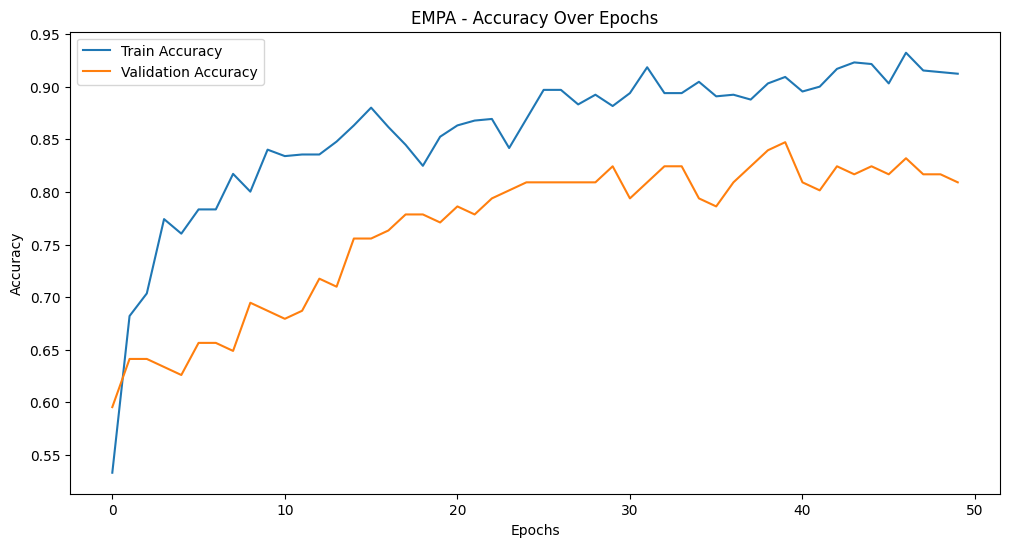

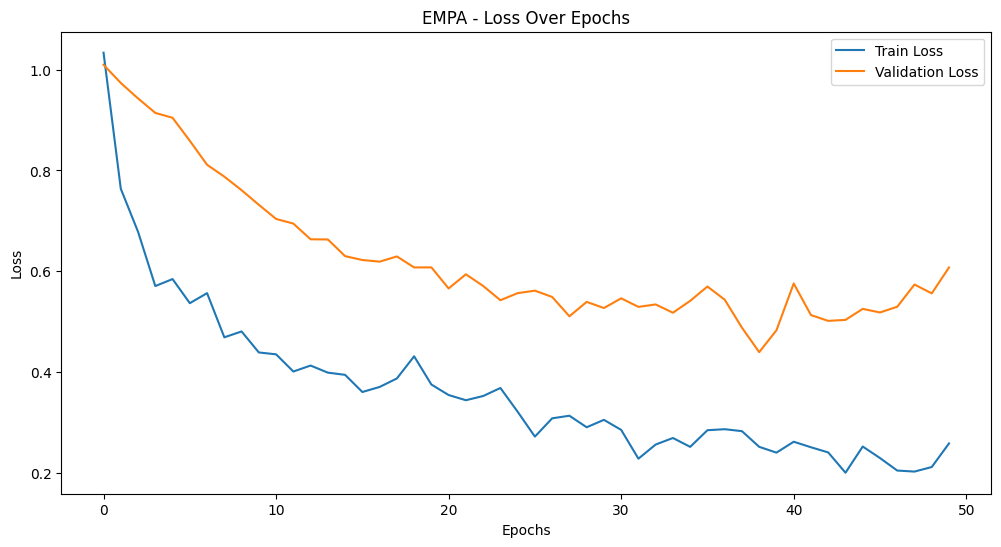

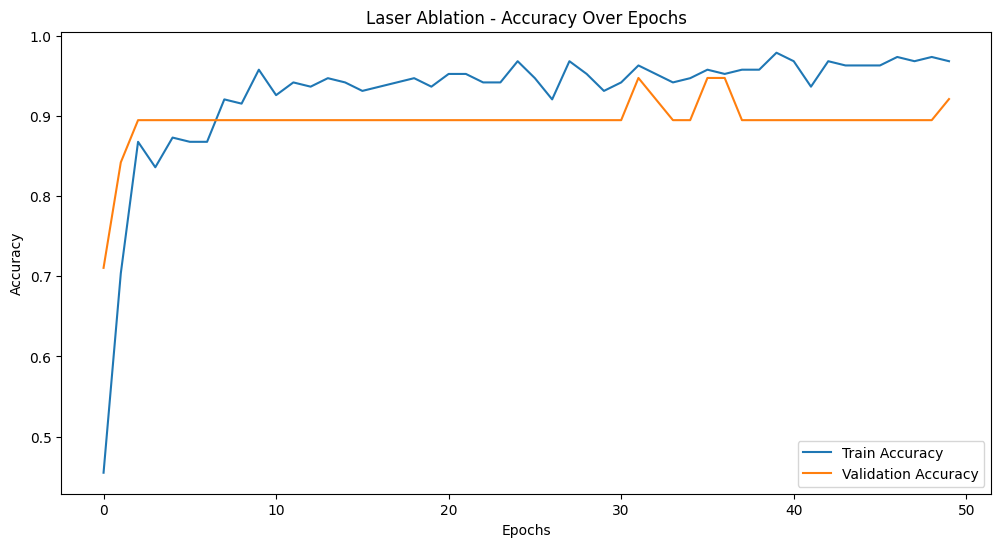

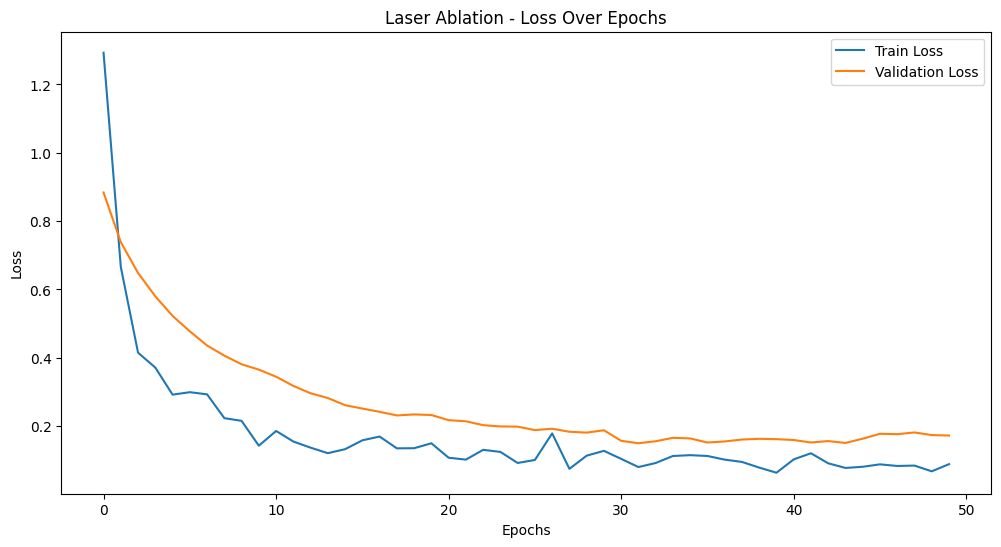

In [47]:
# Plot training history for EMPA
plot_training_history(empa_history, "EMPA")

# Plot training history for Laser Ablation
plot_training_history(laser_history, "Laser Ablation")


In [48]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.optimizers import Adam

# # Function to create and train a deep learning model with learning rate scheduling
# def train_deep_learning_model(X_train, y_train, X_test, y_test, is_regression=False):
#     # Define the model architecture
#     model = Sequential([
#         Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Increase the number of neurons
#         Dropout(0.3),  # Adjust dropout rate
#         Dense(64, activation='relu'),
#         Dropout(0.3),
#         Dense(1, activation='linear' if is_regression else 'sigmoid')  # 'linear' for regression, 'sigmoid' for binary classification
#     ])

#     # Compile the model with learning rate scheduling
#     initial_learning_rate = 0.01   # Starting learning rate
#     optimizer = Adam(learning_rate=initial_learning_rate)

#     if is_regression:
#         model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
#     else:
#         model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#     # Early Stopping to prevent overfitting
#     early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#     # Model Checkpoint to save the best model
#     model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

#     # ReduceLROnPlateau to adjust learning rate when validation loss plateaus
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)

#     # Train the model
#     history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1,
#                         callbacks=[early_stopping, model_checkpoint, reduce_lr])

#     # Evaluate the model on the test data
#     loss, metric = model.evaluate(X_test, y_test, verbose=0)
#     print(f"Test Metric: {metric * 100:.2f}%")

#     return model, history

# # Train and evaluate the model on EMPA data (binary classification)
# print("\nTraining Deep Learning Model on EMPA Data:")
# empa_model, empa_history = train_deep_learning_model(empa_X_train_dl, empa_y_train_dl, empa_X_test_dl, empa_y_test_dl, is_regression=False)

# # Train and evaluate the model on Laser Ablation data (binary classification)
# print("\nTraining Deep Learning Model on Laser Ablation Data:")
# laser_model, laser_history = train_deep_learning_model(laser_X_train_dl, laser_y_train_dl, laser_X_test_dl, laser_y_test_dl, is_regression=False)
